Part 1

In [2]:
import os
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd
import soundfile as sf

Step 1.0

In [14]:
music_stereo, f1 = sf.read('music.wav')
music_mono = music_stereo[:,0]/2 + music_stereo[:,1]/2 # Convert to mono format

music = music_mono / np.amax(abs(music_mono)) # Music normalized 

N = 512 # frame length
hann = np.hanning(N)
                             
size = np.size(music)
frames = []                             

#print(size//512)
#print(size/512)

i = 0 
while i <= (size - 512):
    frames.append(music[i:i+512]*hann)   # List of frames of 512 specimens windowed with hanning
    i = i + 512

#print(len(frames))

Zeros = np.zeros(512 - (size - i))
frames.append(np.concatenate((music[i:], Zeros), axis = None)*hann)

#print(np.size(frames[-1]))
#print(frames[-1])

Text(0, 0.5, 'Bark')

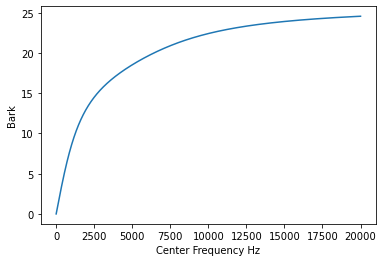

In [20]:
%matplotlib inline
f = np.arange(0,20000,1)
b = 13* np.arctan(0.00076*f) + 3.5*np.arctan((f/7500)**2) # bark scale

plt.plot(f,b)
plt.xlabel('Center Frequency Hz')
plt.ylabel('Bark')

